In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from calcwf import total2chirp

/home/ben.patterson/.conda/envs/igwn_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


In [2]:
with open(os.path.join('harm_power_data', 'dataslot_4', 'all_matches'), 'rb') as fp:
        grid_data = pickle.load(fp)

# Find min and max
for param in list(grid_data.keys()):
    for key in list(grid_data[param].keys()):
        if key not in ['params', 'vary_param', 'param_vals'] and 'phase' not in key:
            grid_data[param][f'{key}_max'] = np.nanmax(np.array(grid_data[param][key]), axis=1)
            grid_data[param][f'{key}_min'] = np.nanmin(np.array(grid_data[param][key]), axis=1)
grid_data['vary_q']['param_vals'] = 1/grid_data['vary_q']['param_vals']

# Raw SNR

In [3]:
def fixed_params(data, vary_param):
    param_dict = {'e': f'{data["e"]:.1f}', 'chirp': f'{total2chirp(data["M"], data["q"]):.0f}~M_\odot', 'q': f'{1/data["q"]:.1f}'}
    param_text = {'e': '$e_{10}$', 'chirp': '$\\mathcal{M}$', 'q': '$q$'}
    keys = list(param_dict.keys())
    keys.remove(vary_param.split('_')[-1])
    return [[param_text[key], param_dict[key]] for key in keys]

/tmp/ipykernel_2274072/286017724.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


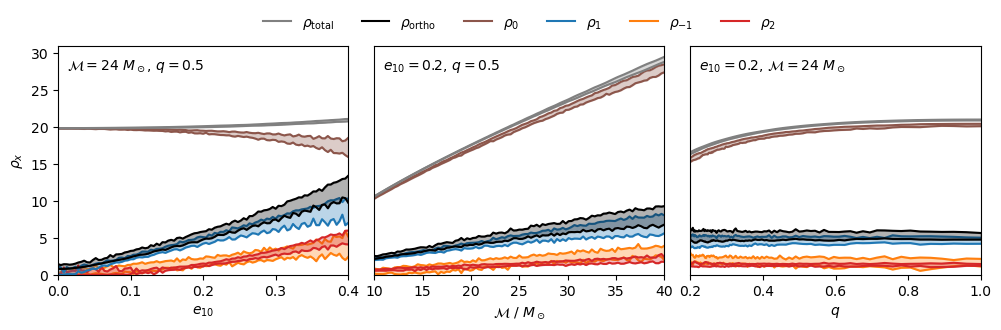

In [15]:
# Panel settings
xlims = [(0,0.4), (10,40), (0.2,1)]
xlabels = ['$e_{10}$', '$\\mathcal{M}~/~M_\odot$', '$q$']

# SNR key settings
keys = ['total_SNR', 'ortho_SNR', 'h0', 'h1', 'h-1', 'h2']
labels = ['$\\rho_\\mathrm{total}$', '$\\rho_\\mathrm{ortho}$', '$\\rho_0$', '$\\rho_1$', '$\\rho_{-1}$', '$\\rho_2$']
colors = ['gray', 'k', 'C5', 'C0', 'C1', 'C3']
zorders = [6,5,4,3,1,2]
zorders = np.array(zorders)/np.max(zorders)

# Make plots
fig, axs = plt.subplots(ncols=3,figsize=(1.86*6.4, 0.62*4.8), sharey=True, gridspec_kw={'wspace': 0.09})
for i, param in enumerate(list(grid_data.keys())):
    for j in range(len(keys)):
        z_max = np.polyfit(grid_data[param]['param_vals'], grid_data[param][f'{keys[j]}_max'], 5)
        f_max = np.poly1d(z_max)
        z_min = np.polyfit(grid_data[param]['param_vals'], grid_data[param][f'{keys[j]}_min'], 5)
        f_min = np.poly1d(z_min)
        axs[i].plot(grid_data[param]['param_vals'], grid_data[param][f'{keys[j]}_max'], c=colors[j], zorder=zorders[j], label=labels[j])
        axs[i].plot(grid_data[param]['param_vals'], grid_data[param][f'{keys[j]}_min'], c=colors[j], zorder=zorders[j])
        axs[i].fill_between(grid_data[param]['param_vals'], grid_data[param][f'{keys[j]}_min'], 
                         grid_data[param][f'{keys[j]}_max'], color=colors[j], zorder=zorders[j], alpha=0.3)

    # Parameter text
    text_list = fixed_params(grid_data[param]['params'], param)
    text = ''
    for text_param in text_list:
        text += f'{text_param[0][:-1]}={text_param[1]}$, '
    axs[i].text(0.03, 0.95, text[:-2], transform=axs[i].transAxes, horizontalalignment='left', verticalalignment='top')

    # Panel formatting
    axs[i].set_xlim(xlims[i])
    axs[i].set_xlabel(xlabels[i])
    axs[i].set_ylabel('$\\rho_x$')
    if i>0:
        axs[i].get_yaxis().set_visible(False)

# Plot formatting
axs[1].legend(frameon=False, ncols=6, loc='center', bbox_to_anchor=(0.5, 1.1))
axs[1].set_ylim(0,)
plt.tight_layout()

/tmp/ipykernel_2274072/728535367.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


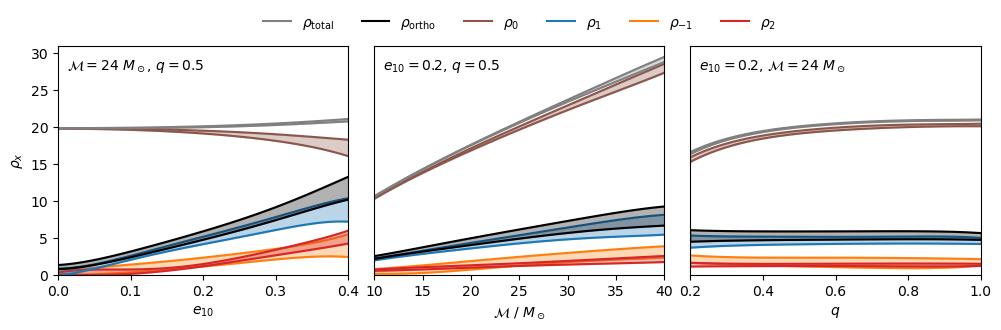

In [17]:
# Panel settings
xlims = [(0,0.4), (10,40), (0.2,1)]
xlabels = ['$e_{10}$', '$\\mathcal{M}~/~M_\odot$', '$q$']

# SNR key settings
keys = ['total_SNR', 'ortho_SNR', 'h0', 'h1', 'h-1', 'h2']
labels = ['$\\rho_\\mathrm{total}$', '$\\rho_\\mathrm{ortho}$', '$\\rho_0$', '$\\rho_1$', '$\\rho_{-1}$', '$\\rho_2$']
colors = ['gray', 'k', 'C5', 'C0', 'C1', 'C3']
zorders = [6,5,4,3,1,2]
zorders = np.array(zorders)/np.max(zorders)

# Make plots
fig, axs = plt.subplots(ncols=3,figsize=(1.86*6.4, 0.62*4.8), sharey=True, gridspec_kw={'wspace': 0.09})
for i, param in enumerate(list(grid_data.keys())):
    for j in range(len(keys)):
        z_max = np.polyfit(grid_data[param]['param_vals'], grid_data[param][f'{keys[j]}_max'], 5)
        f_max = np.poly1d(z_max)
        z_min = np.polyfit(grid_data[param]['param_vals'], grid_data[param][f'{keys[j]}_min'], 5)
        f_min = np.poly1d(z_min)
        axs[i].plot(grid_data[param]['param_vals'], f_max(grid_data[param]['param_vals']), c=colors[j], zorder=zorders[j], label=labels[j])
        axs[i].plot(grid_data[param]['param_vals'], f_min(grid_data[param]['param_vals']), c=colors[j], zorder=zorders[j])
        axs[i].fill_between(grid_data[param]['param_vals'], f_min(grid_data[param]['param_vals']), 
                         f_max(grid_data[param]['param_vals']), color=colors[j], zorder=zorders[j], alpha=0.3)

    # Parameter text
    text_list = fixed_params(grid_data[param]['params'], param)
    text = ''
    for text_param in text_list:
        text += f'{text_param[0][:-1]}={text_param[1]}$, '
    axs[i].text(0.03, 0.95, text[:-2], transform=axs[i].transAxes, horizontalalignment='left', verticalalignment='top')

    # Panel formatting
    axs[i].set_xlim(xlims[i])
    axs[i].set_xlabel(xlabels[i])
    axs[i].set_ylabel('$\\rho_x$')
    if i>0:
        axs[i].get_yaxis().set_visible(False)

# Plot formatting
axs[1].legend(frameon=False, ncols=6, loc='center', bbox_to_anchor=(0.5, 1.1))
axs[1].set_ylim(0,)
plt.tight_layout()
plt.savefig('Figures/harm_power.png', dpi=450, bbox_inches='tight')

# Divided by max total SNR line

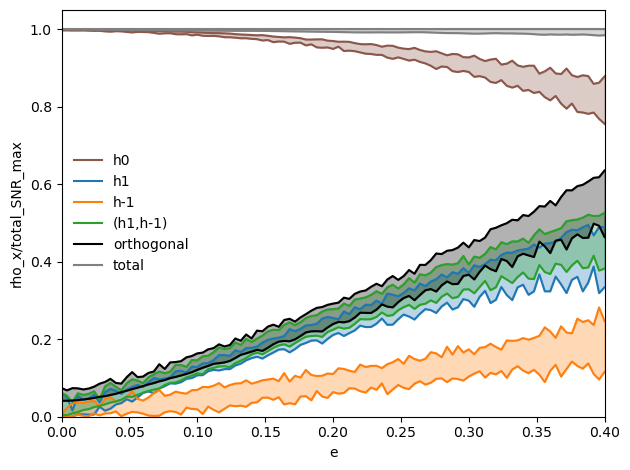

In [6]:
param = list(grid_data.keys())[0]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(0,0.4)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x/total_SNR_max')
plt.tight_layout()

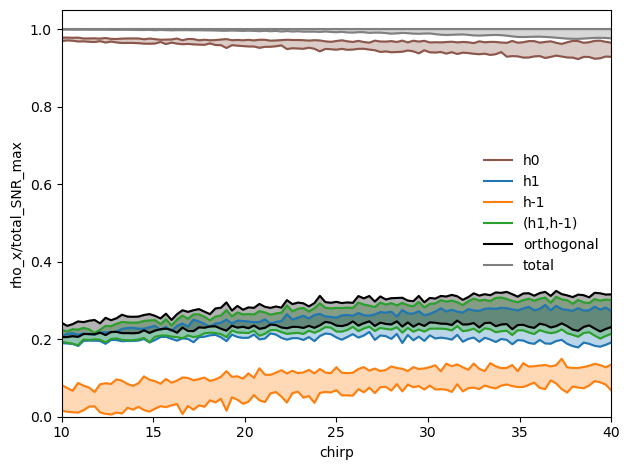

In [7]:
param = list(grid_data.keys())[1]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(10,40)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x/total_SNR_max')
plt.tight_layout()

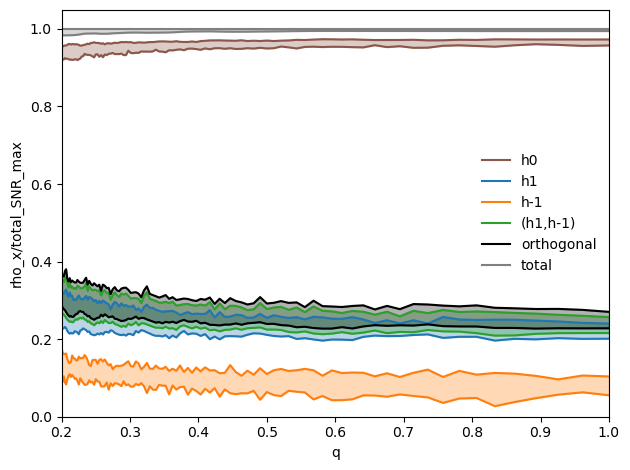

In [8]:
param = list(grid_data.keys())[2]

# Plot for each chirp mass
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], c='C5', label='h0')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], c='C5')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h0_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h0_max']/grid_data[param]['total_SNR_max'], color='C5', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], c='C0', label='h1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], c='C0')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_max']/grid_data[param]['total_SNR_max'], color='C0', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], c='C1', label='h-1')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], c='C1')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h-1_max']/grid_data[param]['total_SNR_max'], color='C1', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], c='C2', label='(h1,h-1)')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], c='C2')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['h1_h-1_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['h1_h-1_max']/grid_data[param]['total_SNR_max'], color='C2', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], c='k', label='orthogonal')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], c='k')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['ortho_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['ortho_SNR_max']/grid_data[param]['total_SNR_max'], color='k', alpha=0.3)
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], c='gray', label='total')
plt.plot(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], c='gray')
plt.fill_between(grid_data[param]['param_vals'], grid_data[param]['total_SNR_min']/grid_data[param]['total_SNR_max'], 
                 grid_data[param]['total_SNR_max']/grid_data[param]['total_SNR_max'], color='gray', alpha=0.3)
plt.legend(frameon=False)
plt.xlim(0.2,1)
plt.ylim(0,)
plt.xlabel(grid_data[param]['vary_param'])
plt.ylabel('rho_x/total_SNR_max')
plt.tight_layout()